
<h1 align ="center" style = "color:blue">  Implémentation VGG 19</h1>
<h3 align ="center" style = "color:blue">Mohamed walid hajoub SIDSD0001/21 </h3>

## importer les bibliothéque

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

## Importer Dataset

In [2]:
train_path = 'D:\\Cotton_Disease\\train'
test_path = 'D:\\Cotton_Disease\\test'
IMAGE_SIZE =[224, 224]

Cette étape est un prétraitement de données, nous travaillons avec une image c'est pourquoi nous faisons Image Augmentation.
 Ici, nous passons d'abord plusieurs arguments , c'est comme 
 - **une mise à l'échelle** des caractéristiques qui fait dans le prétraitement des données ici notre image de 0 à 255 pixels et nous redimensionnons en 0 et 1. 
 - Ensuite, c'est **Shear_range** appliquer des transactions aléatoires et nous garderons cette 0.2. 
 - **zoom_range** qui appliquera un zoom aléatoire et nous gardons la valeur 0,2. 
 - Et puis le dernier est **horizontal_flip** Inverser aléatoirement les entrées horizontalement

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,  # donner chaque 32 image pour entrainner 32 par 32
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


### analyse Dataset

In [6]:
print("******************************* trainset data **************************")
print("nombre de classe ",len(training_set.class_indices))
print("classe est : ",training_set.class_indices)
print("taille de chaque image",training_set.image_shape)

print("******************************* testset data **************************")
print("nombre de classe ",len(test_set.class_indices))
print("classe est : ",test_set.class_indices)
print("taille de chaque image",test_set.image_shape)

nbr_class = len(training_set.class_indices)


******************************* trainset data **************************
nombre de classe  4
classe est :  {'diseased cotton plant': 0, 'diseased_cotton_leaf': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
taille de chaque image (224, 224, 3)
******************************* testset data **************************
nombre de classe  4
classe est :  {'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
taille de chaque image (224, 224, 3)


## creation de VGG19 utiliser librairie keras ou crée propre code

### code source

In [21]:
def VGG19():
    
    #Block 1
    x = Conv2D(filters = 64, kernel_size = (3,3), padding='same' , activation='relu', input_shape=(224,224,3)) 
    x = Conv2D(filters = 64, kernel_size = (3,3), padding='same' , activation='relu') (x) 
    x = MaxPool2D(pool_size=(2,2) , strides=(2,2) , padding='same') (x)
    
    #Block 2
    x = Conv2D(filters = 128, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 128, kernel_size = (3,3), padding='same' , activation='relu') (x) 
    x = MaxPool2D(pool_size=(2,2) , strides=(2,2) , padding='same') (x)
    
    #Block 3
    x = Conv2D(filters = 256, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 256, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 256, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 256, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = MaxPool2D(pool_size=(2,2) , strides=(2,2) , padding='same') (x)
    
    #Block 4
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = MaxPool2D(pool_size=(2,2) , strides=(2,2) , padding='same') (x)
    
    #Block 5
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = Conv2D(filters = 512, kernel_size = (3,3), padding='same' , activation='relu') (x)
    x = MaxPool2D(pool_size=(2,2) , strides=(2,2) , padding='same') (x)
    
    #Block 6
    x = Flatten()(x)
    x = Dense(units = 4096 , activation='relu') (x)
    x = Dense(units = 4096 , activation='relu') (x)
    x = Dense(units = 1000 , activation='softmax') (x)
    return model

### keras librairie

In [9]:
vgg19 = VGG19( input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Dans Keras, chaque couche a un paramètre appelé "trainable". Pour geler les poids d'une couche particulière, nous devons définir ce paramètre sur **False**, indiquant que cette couche ne doit pas être entraînée. Après cela, nous passons en revue chaque couche et sélectionnons les couches que nous voulons former.

In [10]:
for layer in vgg19.layers:
    layer.trainable = False

### Aplatir la sortie de 3D -> 1D

In [11]:
x = Flatten()(vgg19.output)

### Connect layer

In [13]:
x = Dense(nbr_class, activation='relu')(x)
x = Dense(nbr_class, activation='relu')(x)
prediction = Dense(nbr_class, activation='softmax')(x)


### définir Modele

In [16]:
model = Model(inputs=vgg19.input, outputs=prediction)

### visualiser structure de Modele

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Compiler Modele

In [18]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Entrainer modele

In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp/ipykernel_16500/2574855507.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/6
61/61 [==============================] - 911s 15s/step - loss: 1.3790 - accuracy: 0.4141 - val_loss: 1.3896 - val_accuracy: 0.2358
Epoch 2/6
61/61 [==============================] - 809s 13s/step - loss: 1.3586 - accuracy: 0.4177 - val_loss: 1.3961 - val_accuracy: 0.2358
Epoch 3/6
61/61 [==============================] - 772s 13s/step - loss: 1.3425 - accuracy: 0.4177 - val_loss: 1.4054 - val_accuracy: 0.2358
Epoch 4/6
61/61 [==============================] - 670s 11s/step - loss: 1.3300 - accuracy: 0.4177 - val_loss: 1.4175 - val_accuracy: 0.2358
Epoch 5/6
61/61 [==============================] - 699s 11s/step - loss: 1.3216 - accuracy: 0.4177 - val_loss: 1.4304 - val_accuracy: 0.2358
Epoch 6/6
61/61 [==============================] - 707s 12s/step - loss: 1.3164 - accuracy: 0.4177 - val_loss: 1.4417 - val_accuracy: 0.2358


### Visualiser Loss / accuracy

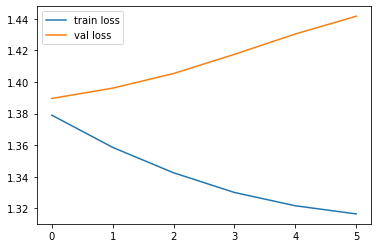

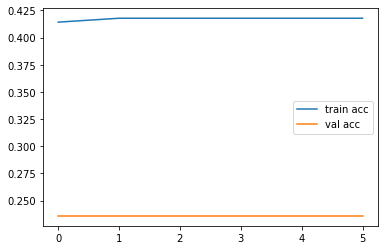

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### sauvegarger Modele

In [ ]:
model.save('model_vgg19.h5')

### prédiction

In [ ]:
y_pred = model.predict(test_set)
y_pred


4/4 [==============================] - 39s 9s/step


array([[2.56445855e-01, 3.79233599e-01, 1.80914029e-01, 1.83406457e-01],
       [6.11341884e-03, 1.37990774e-28, 4.83018837e-35, 9.93886530e-01],
       [3.82818617e-02, 2.65389751e-03, 9.57659960e-01, 1.40438834e-03],
       [1.89391824e-06, 1.27361576e-14, 6.48114605e-17, 9.99998093e-01],
       [9.55017269e-01, 0.00000000e+00, 0.00000000e+00, 4.49827462e-02],
       [7.54078388e-01, 1.44054599e-31, 0.00000000e+00, 2.45921627e-01],
       [1.47994421e-02, 4.43479221e-04, 9.84516561e-01, 2.40542548e-04],
       [5.32275081e-01, 6.43923146e-37, 0.00000000e+00, 4.67724919e-01],
       [1.49424188e-04, 8.58466578e-08, 9.99850392e-01, 5.23069268e-08],
       [1.87251717e-03, 9.41884082e-06, 9.98112679e-01, 5.38413315e-06],
       [9.75369155e-01, 0.00000000e+00, 0.00000000e+00, 2.46308148e-02],
       [9.60336804e-01, 0.00000000e+00, 0.00000000e+00, 3.96632478e-02],
       [2.56445855e-01, 3.79233599e-01, 1.80914029e-01, 1.83406457e-01],
       [4.77498537e-03, 5.37400847e-05, 9.95141268e

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 3, 2, 3, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 3, 2, 3, 2, 3,
       3, 3, 2, 1, 3, 1, 2, 1, 3, 0, 1, 2, 3, 3, 1, 1, 1, 0, 3, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 1, 0, 3, 2, 0, 3, 3, 2, 2, 2, 1, 2, 2, 1, 3, 3,
       2, 1, 0, 2, 3, 0, 1, 2, 0, 1, 2, 1, 3, 2, 0, 2, 3, 2, 0, 1, 0, 0,
       2, 0, 1, 1, 0, 0, 3, 0, 1, 3, 3, 0, 1, 3, 0, 2, 2, 0], dtype=int64)

### charger Modele 

In [ ]:
model=load_model('model_vgg16.h5')

### prédiction par une image

In [ ]:
#charger image
img=image.load_img('D:\\3.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[119., 108., 104.],
        [121., 110., 106.],
        [ 79.,  68.,  64.],
        ...,
        [123., 161.,  86.],
        [109., 147.,  70.],
        [106., 146.,  83.]],

       [[123., 112., 108.],
        [101.,  90.,  86.],
        [ 68.,  57.,  53.],
        ...,
        [134., 172.,  99.],
        [146., 184., 109.],
        [148., 188., 125.]],

       [[171., 160., 156.],
        [150., 139., 135.],
        [203., 192., 188.],
        ...,
        [131., 168.,  99.],
        [123., 160.,  91.],
        [124., 164., 101.]],

       ...,

       [[169., 212., 156.],
        [170., 213., 157.],
        [172., 215., 159.],
        ...,
        [137., 127., 118.],
        [123., 113., 104.],
        [127., 117., 108.]],

       [[166., 209., 153.],
        [172., 215., 159.],
        [168., 211., 155.],
        ...,
        [140., 130., 121.],
        [129., 119., 110.],
        [117., 107.,  98.]],

       [[167., 210., 154.],
        [164., 207., 151.],
        [168., 2

In [ ]:
print(x.shape)


(224, 224, 3)


In [ ]:
from keras.applications.inception_v3 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 383ms/step


array([[0.26542643, 0.3509244 , 0.21337363, 0.17027554]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 381ms/step


In [ ]:
classe = training_set.class_indices
print(a)
for k,v in classe.items():
    if(a == v):
        print("appartient a clsse de : ",k)

[1]
appartient a clsse de :  diseased_cotton_leaf
